In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Hydrogen Atom
Let's start by solving the 1 dimensional hydrogen atom. After making reduced units and making
the potential becomes: $V(x) = \frac{-1}{|X| + \epsilon}$ where $\epsilon = 10^{-4}$

The hamiltonian becomes as follows:

$H = \frac{\hat{P}^2}{2m} + \hat{V}(X)$

First, let's generate the momentum and space operator using what we learned in **module1**.

In [6]:
n = 1001
a = 10 / 1000
epsilon = 10 ** -4


X = np.linspace(-5, 5, n)
# here we don't make X to be a matrix since,
# the potential is a function of x and only V is the operator


# making shift_op
shift_op = np.eye(n, k=1)
shift_op[n-1, 0] = 1
shift_op = np.asmatrix(shift_op)

# diagonalizing the shift_op
vals, vecs = np.linalg.eig(shift_op)

# making P
P = vecs * np.diag(np.angle(vals)) * vecs.H / a

Now we generate the Potential $V$

In [11]:
V = np.diag(-1 / (np.absolute(X) + epsilon))
V

array([[-0.199996  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.20039679,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.20079918, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.20079918,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.20039679,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.199996  ]])

Now the hamiltonian, note that $m = 1$

In [12]:
H = P ** 2 / 2 + V

It's time to diagonalize the hamiltonian and find the eigen states and eigen values in the reduced units.

[-3.52081062e+03 -4.96207338e-01 -4.83133012e-01 -1.08251937e-01
  1.40488655e-01  5.65278314e-01  1.05060175e+00  1.69409845e+00
  2.37705290e+00  3.23505309e+00]


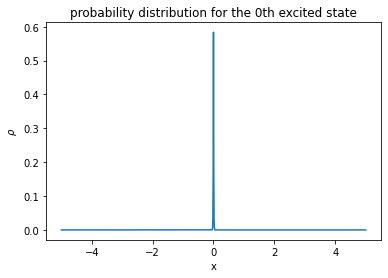

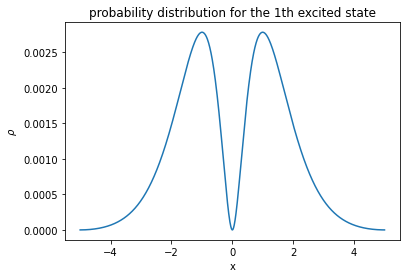

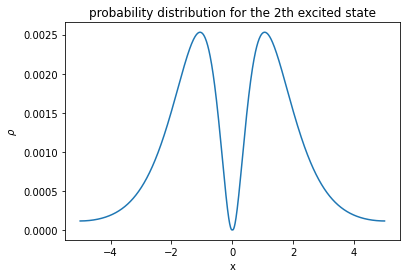

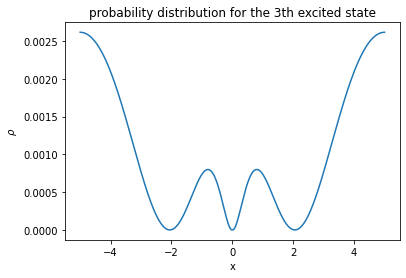

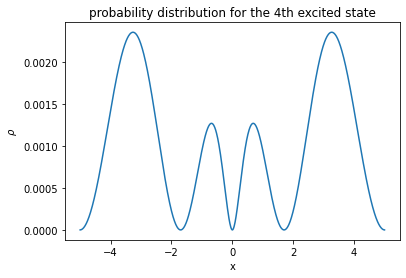

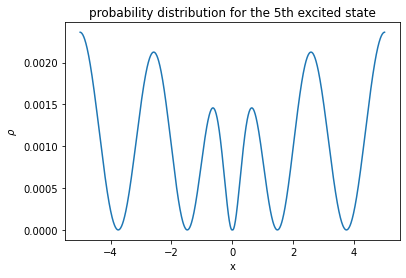

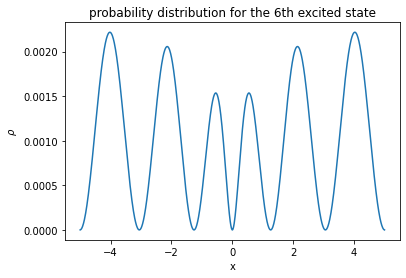

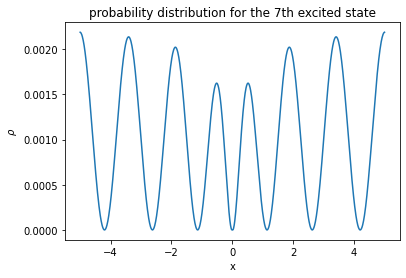

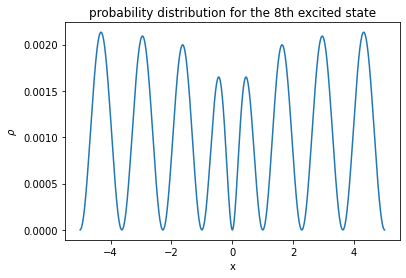

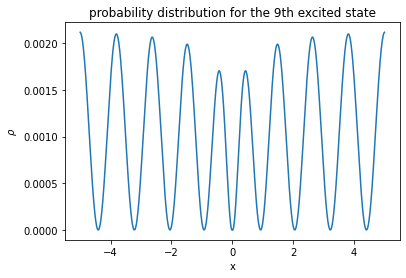

In [13]:
vals, vecs = np.linalg.eigh(H)

print(vals[:10])

for i in range(10):
    plt.plot(X, np.absolute(np.array(vecs)[:, i]) ** 2)
    plt.title(f"probability distribution for the {i}th excited state")
    plt.ylabel(r"$\rho$")
    plt.xlabel("x")
    plt.show()
    plt.close()
